In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
import warnings
warnings.filterwarnings('ignore')

**importing the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file = zipfile.ZipFile('/content/drive/My Drive/household_power_consumption.zip', 'r')
file.extractall('data') 

In [4]:
df = pd.read_csv('/content/data/household_power_consumption.txt', sep = ';', low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [7]:
# replacing values
df.replace('?', 'nan', inplace=True)


In [8]:
# changing data types from object to float
df = df.astype('float')

In [9]:
# rechecking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


#### QUESTION 11. Resample the data from a minute sampling rate to a daily sampling rate (i.e sum over the minutes for each day). Also, fill all the missing values with the mean (average) of their attribute/column. Which of the following is a plot of the daily global_active_power over time?

In [10]:
# checking for missing values
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
# filling the missing values with mean
df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].mean())
df['Global_reactive_power'] = df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean())
df['Voltage'] = df['Voltage'].fillna(df['Voltage'].mean())
df['Global_intensity'] = df['Global_intensity'].fillna(df['Global_intensity'].mean())
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean())
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean())
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean())

In [12]:
# checking if all missing values has been filled
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
df.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
# Resampling the data to daily sampling rates

df_resample_daily = df.resample('D').sum()
print(df_resample_daily.head())

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16             1209.176  ...          4926.0
2006-12-17             3390.460  ...         13341.0
2006-12-18             2203.826  ...         14018.0
2006-12-19             1666.194  ...          6197.0
2006-12-20             2225.748  ...         14063.0

[5 rows x 7 columns]


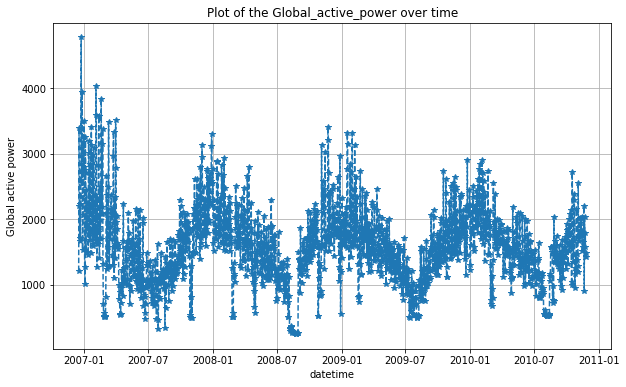

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df_resample_daily.index, df_resample_daily.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('datetime')
plt.ylabel('Global active power')
plt.title('Plot of the Global_active_power over time');

#### QUESTION 12. What is the Pearson correlation coefficient between the global_active_power and global_reactive_power? To 2 decimal places.

In [16]:
import scipy
import scipy.stats
from scipy.stats import pearsonr

In [17]:
pear_corr1,_ = pearsonr(df_resample_daily.Global_active_power,df_resample_daily.Global_reactive_power)
print('Pearsons correlation: %.2f' % pear_corr1)

Pearsons correlation: 0.04


#### QUESTION 13. What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.

In [18]:
pear_corr2,_ = pearsonr(df_resample_daily.Voltage,df_resample_daily.Global_intensity)
print('Pearsons correlation: %.2f' % pear_corr2)

Pearsons correlation: 0.05


#### QUESTION 14. Using the daily sampling rate(sum), divide the data into a train and test set. The last 365 days is your test set and the first (x-365) days is training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modelling using this time column ('dt' or 'ds') and the global_active-power (or 'y'). evaluate the results of your time series modelling on the test set, what is the MAPE (in %) in 2 decimal places?

In [19]:
df_resample_daily.shape

(1442, 7)

In [20]:
# training set
train_df = df_resample_daily.iloc[:1077,:]

In [21]:
train_df.shape

(1077, 7)

In [22]:
# last 365 as test set
test_df = df_resample_daily.iloc[1077:,:]

In [23]:
test_df.shape

(365, 7)

In [24]:
from fbprophet import Prophet

In [25]:
train_df.reset_index(inplace = True)
train_df.head

<bound method NDFrame.head of        datetime  Global_active_power  ...  Sub_metering_2  Sub_metering_3
0    2006-12-16             1209.176  ...           546.0          4926.0
1    2006-12-17             3390.460  ...          4187.0         13341.0
2    2006-12-18             2203.826  ...          2621.0         14018.0
3    2006-12-19             1666.194  ...          7602.0          6197.0
4    2006-12-20             2225.748  ...          2648.0         14063.0
...         ...                  ...  ...             ...             ...
1072 2009-11-22             2450.976  ...           411.0         16097.0
1073 2009-11-23             1471.122  ...           402.0          8230.0
1074 2009-11-24             2128.856  ...          4579.0          9086.0
1075 2009-11-25             1980.130  ...          5083.0         10596.0
1076 2009-11-26             1599.626  ...           407.0         10069.0

[1077 rows x 8 columns]>

In [26]:
df_train = train_df.iloc[:,:2]

In [27]:
df_train = df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_train

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1072,2009-11-22,2450.976
1073,2009-11-23,1471.122
1074,2009-11-24,2128.856
1075,2009-11-25,1980.130


In [28]:
test_df.reset_index(inplace = True)
test_df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
2,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
3,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
4,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0
...,...,...,...,...,...,...,...,...
360,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
361,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
362,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
363,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [29]:
df_test = test_df.iloc[:,:2]

In [30]:
df_test = df_test.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_test

,ds,y
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378
...,...,...
360,2010-11-22,2041.536
361,2010-11-23,1577.536
362,2010-11-24,1796.248
363,2010-11-25,1431.164


In [31]:
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
forecast = model.predict(df_test) 
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1583.306870,1564.689212,2647.453468,1583.306870,1583.306870,518.920935,518.920935,518.920935,-64.095698,-64.095698,-64.095698,583.016633,583.016633,583.016633,0.0,0.0,0.0,2102.227805
1,2009-11-28,1583.442715,1855.231057,2968.918379,1583.442715,1583.442715,822.086242,822.086242,822.086242,245.727868,245.727868,245.727868,576.358374,576.358374,576.358374,0.0,0.0,0.0,2405.528957
2,2009-11-29,1583.578560,1799.019525,2926.844208,1583.578560,1583.578560,796.157498,796.157498,796.157498,228.437514,228.437514,228.437514,567.719983,567.719983,567.719983,0.0,0.0,0.0,2379.736058
3,2009-11-30,1583.714406,1433.652797,2532.341355,1583.714406,1583.714406,396.388235,396.388235,396.388235,-161.218418,-161.218418,-161.218418,557.606654,557.606654,557.606654,0.0,0.0,0.0,1980.102641
4,2009-12-01,1583.850251,1552.498273,2654.728326,1583.850251,1583.850251,517.221117,517.221117,517.221117,-29.322660,-29.322660,-29.322660,546.543777,546.543777,546.543777,0.0,0.0,0.0,2101.071368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1632.211137,1536.670209,2580.887613,1619.510465,1644.832671,407.940658,407.940658,407.940658,-161.218418,-161.218418,-161.218418,569.159076,569.159076,569.159076,0.0,0.0,0.0,2040.151795
361,2010-11-23,1632.346982,1622.938953,2756.366387,1619.564134,1644.997791,549.965516,549.965516,549.965516,-29.322660,-29.322660,-29.322660,579.288175,579.288175,579.288175,0.0,0.0,0.0,2182.312497
362,2010-11-24,1632.482827,1669.889000,2746.993642,1619.668523,1645.165160,560.928652,560.928652,560.928652,-24.708936,-24.708936,-24.708936,585.637588,585.637588,585.637588,0.0,0.0,0.0,2193.411479
363,2010-11-25,1632.618672,1487.611642,2563.603124,1619.774496,1645.352647,393.578382,393.578382,393.578382,-194.819670,-194.819670,-194.819670,588.398052,588.398052,588.398052,0.0,0.0,0.0,2026.197054


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2102.227805,1564.689212,2647.453468,1583.306870,1583.306870,1583.306870
1,2009-11-28,2405.528957,1855.231057,2968.918379,1583.442715,1583.442715,1583.442715
2,2009-11-29,2379.736058,1799.019525,2926.844208,1583.578560,1583.578560,1583.578560
3,2009-11-30,1980.102641,1433.652797,2532.341355,1583.714406,1583.714406,1583.714406
4,2009-12-01,2101.071368,1552.498273,2654.728326,1583.850251,1583.850251,1583.850251
...,...,...,...,...,...,...,...
360,2010-11-22,2040.151795,1536.670209,2580.887613,1632.211137,1619.510465,1644.832671
361,2010-11-23,2182.312497,1622.938953,2756.366387,1632.346982,1619.564134,1644.997791
362,2010-11-24,2193.411479,1669.889000,2746.993642,1632.482827,1619.668523,1645.165160
363,2010-11-25,2026.197054,1487.611642,2563.603124,1632.618672,1619.774496,1645.352647


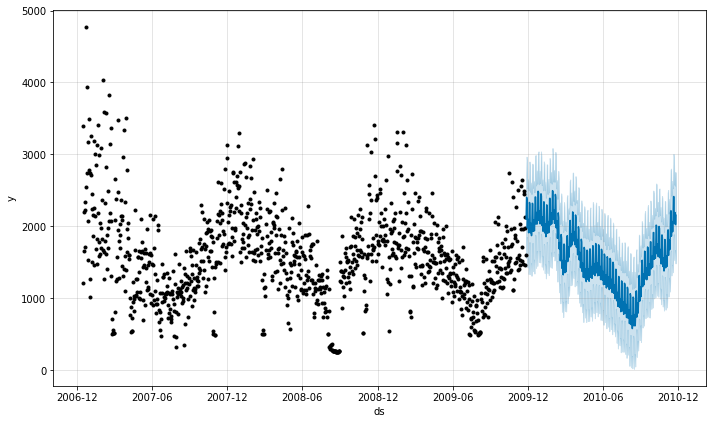

In [34]:
model.plot(forecast)
plt.show()

In [35]:
from sklearn import metrics

In [36]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [37]:
MAPE = Metric(df_test['y'],forecast['yhat'])
print('the Mean Average Percentage Error (MAPE) is: ', round(MAPE, 2))

the Mean Average Percentage Error (MAPE) is:  20.9


#### QUESTION 15. What is the RMSE in 2 decimal places?

In [38]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_test['y'],forecast['yhat']))
RMSE
round(RMSE,2)

375.04

#### QUESTION 16. If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?

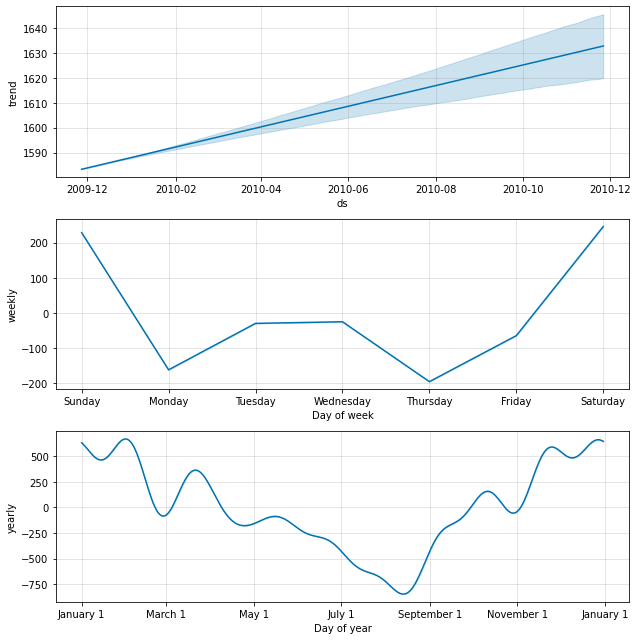

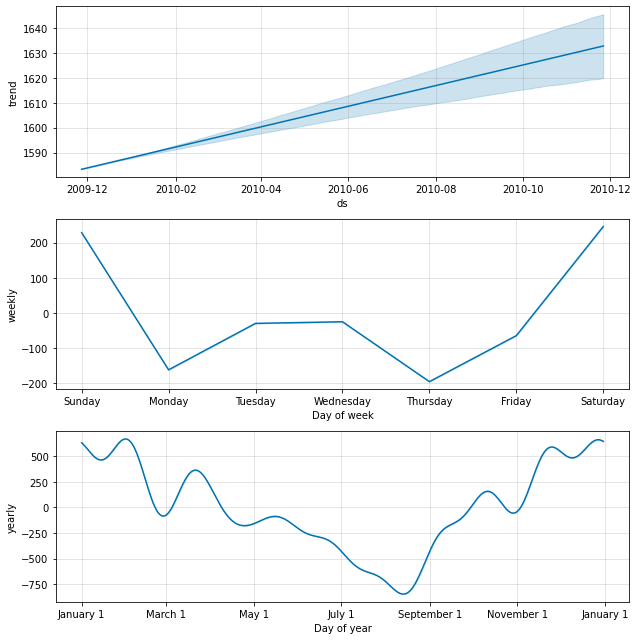

In [39]:
model.plot_components(forecast)

#### Q17.Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 365 days of the house consumption (‘global_active_power’). Answer question 17-19:

Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [40]:
df_resample_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [41]:
df_resample_daily.shape

(1442, 7)

In [42]:
df_resample_daily.reset_index(inplace=True)

In [43]:
df_resample_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [44]:
df_daily = df_resample_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [45]:
df_daily.columns

Index(['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6'], dtype='object')

In [46]:
df_daily

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [47]:
df_daily_train = df_daily.iloc[:1077,:]
df_daily_test = df_daily.iloc[1077:,:]

In [48]:
print(df_daily_train.shape)
print(df_daily_test.shape)

(1077, 8)
(365, 8)


In [49]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [50]:
#fitting the model to train data
model = model.fit(df_daily_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
#making prediction with test set
prediction = model.predict(df_daily_test)

In [52]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1596.426121,1366.291491,1397.243537,1596.426121,1596.426121,7.541574,7.541574,7.541574,0.614069,0.614069,0.614069,-232.325836,-232.325836,-232.325836,2.196835,2.196835,2.196835,0.821706,0.821706,0.821706,3.860963,3.860963,3.860963,-215.231457,-215.231457,-215.231457,-217.290689,-217.290689,-217.290689,-0.112838,-0.112838,-0.112838,2.172070,2.172070,2.172070,0.0,0.0,0.0,1381.194664
1,2009-11-28,1596.556409,1845.439460,1878.456041,1596.556409,1596.556409,-8.886784,-8.886784,-8.886784,0.505234,0.505234,0.505234,263.403386,263.403386,263.403386,-2.022916,-2.022916,-2.022916,0.826962,0.826962,0.826962,7.743796,7.743796,7.743796,265.479235,265.479235,265.479235,261.569679,261.569679,261.569679,1.408596,1.408596,1.408596,2.500960,2.500960,2.500960,0.0,0.0,0.0,1862.035644
2,2009-11-29,1596.686696,1628.337183,1662.064321,1596.686696,1596.686696,-2.797493,-2.797493,-2.797493,1.215510,1.215510,1.215510,47.462898,47.462898,47.462898,0.781457,0.781457,0.781457,-0.578994,-0.578994,-0.578994,-1.461525,-1.461525,-1.461525,47.650995,47.650995,47.650995,44.621854,44.621854,44.621854,0.164156,0.164156,0.164156,2.864986,2.864986,2.864986,0.0,0.0,0.0,1644.337692
3,2009-11-30,1596.816984,1726.303746,1758.704912,1596.816984,1596.816984,3.917803,3.917803,3.917803,1.404493,1.404493,1.404493,131.752113,131.752113,131.752113,0.772224,0.772224,0.772224,0.840102,0.840102,0.840102,4.481991,4.481991,4.481991,146.099282,146.099282,146.099282,143.168725,143.168725,143.168725,-0.338153,-0.338153,-0.338153,3.268710,3.268710,3.268710,0.0,0.0,0.0,1742.916266
4,2009-12-01,1596.947271,1746.407667,1778.972150,1596.947271,1596.947271,5.969075,5.969075,5.969075,0.935274,0.935274,0.935274,150.954235,150.954235,150.954235,2.196835,2.196835,2.196835,0.843781,0.843781,0.843781,2.762874,2.762874,2.762874,165.708177,165.708177,165.708177,163.662074,163.662074,163.662074,-1.669783,-1.669783,-1.669783,3.715886,3.715886,3.715886,0.0,0.0,0.0,1762.655448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1643.329613,1834.229777,2398.974635,1360.335489,1920.691605,5.883516,5.883516,5.883516,-0.075230,-0.075230,-0.075230,472.006090,472.006090,472.006090,-4.207320,-4.207320,-4.207320,-0.079157,-0.079157,-0.079157,1.796047,1.796047,1.796047,475.788813,475.788813,475.788813,475.323947,475.323947,475.323947,-0.338153,-0.338153,-0.338153,0.803020,0.803020,0.803020,0.0,0.0,0.0,2119.118426
361,2010-11-23,1643.459900,1378.514779,1941.205237,1358.435048,1922.143752,6.757642,6.757642,6.757642,0.081740,0.081740,0.081740,12.394010,12.394010,12.394010,-0.271172,-0.271172,-0.271172,0.789120,0.789120,0.789120,-1.767804,-1.767804,-1.767804,17.352790,17.352790,17.352790,17.983536,17.983536,17.983536,-1.669783,-1.669783,-1.669783,1.039037,1.039037,1.039037,0.0,0.0,0.0,1660.812690
362,2010-11-24,1643.590188,1583.733326,2149.047977,1356.595718,1923.718556,7.647097,7.647097,7.647097,-0.144153,-0.144153,-0.144153,209.704152,209.704152,209.704152,0.751119,0.751119,0.751119,-0.467043,-0.467043,-0.467043,4.743104,4.743104,4.743104,224.616620,224.616620,224.616620,222.234276,222.234276,222.234276,1.101892,1.101892,1.101892,1.280452,1.280452,1.280452,0.0,0.0,0.0,1868.206808
363,2010-11-25,1643.720475,1209.574763,1773.364688,1355.496031,1925.415721,10.558235,10.558235,10.558235,0.480265,0.480265,0.480265,-160.853919,-160.853919,-160.853919,0.777500,0.777500,0.777500,0.

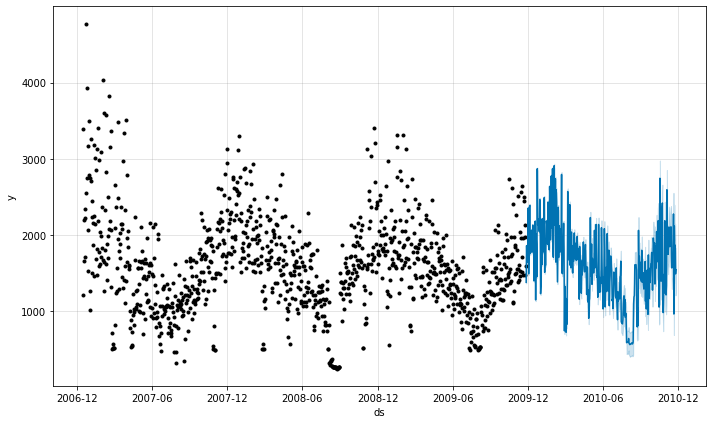

In [53]:
model.plot(prediction)
plt.show()

In [54]:
MAPE = Metric(df_daily_test['y'],prediction['yhat'])
print('Mean Average Percentage Error (MAPE) is: ', round(MAPE,2))

Mean Average Percentage Error (MAPE) is:  2.83


#### QUESTION 18. What is the RMSE in 2 decimal places?

In [55]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_daily_test['y'],prediction['yhat']))
RMSE
round(RMSE,2)

41.93

#### QUESTION 19. If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?

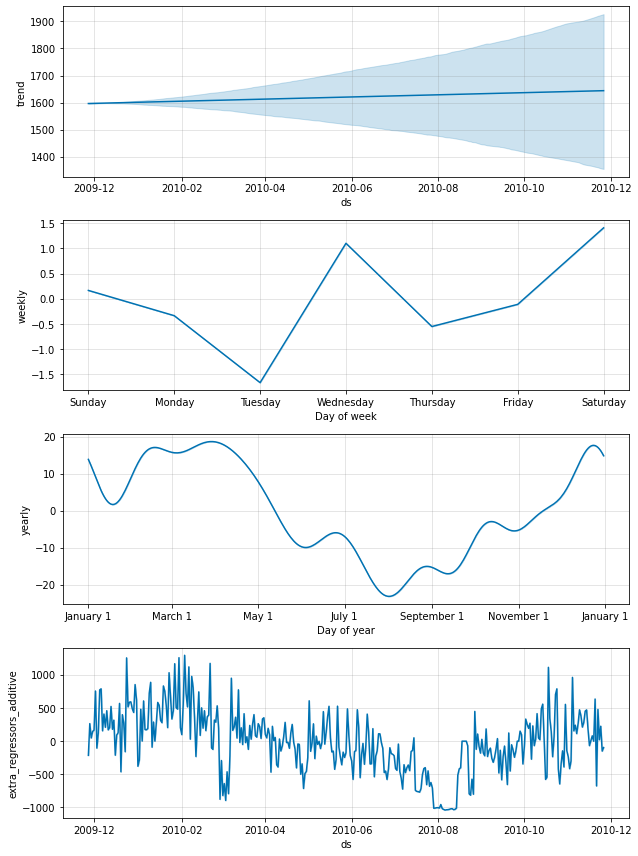

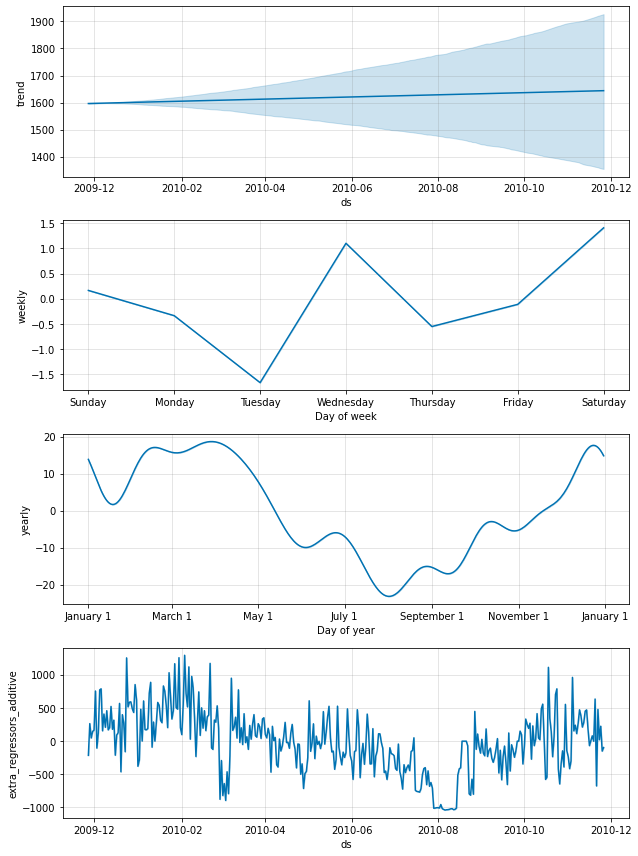

In [56]:
model.plot_components(prediction)